In [48]:
# Analysis :
    
# OBSERVED TREND 1:
#     Major share of the fare revenue is from the urban areas(cities) however, it is derived from many short rides (63% of 
#     revenue from 68% of rides and 78% of the drivers). This also means that business costs are higher (as more drivers and 
#     more cabs are needed to generate same amount of revenue as compared to in rural & suburban cities. Bigger fleet also means 
#     more maintenance and higher insurance costs. Though this market is the bread winner, more growth may not be there. This 
#     needs to be confirmed by finding out the market share as compared to competitors. 
    
# OBSERVED TREND 2:
#     Though rural cities account for very small percentage of revenue, the profit margins are significantly higher, as only 
#     3% of the drivers (with small fleet of vehicles), are generating over 6.5% revenue!! This is because each ride derives 
#     much higher fare revenue on average. (Insurance costs are low too in rural areas). As profit margins are high and 
#     market penetration seems to be low (which needs to be confirmed with more market research), management should think 
#     of tapping the business growth opportunity by increasing market share in rural areas.
                                                                                                        
# OBSERVED TREND 3:                   
#     We think that suburban cities also present significant growth opportunities, as they account for only 26% of the rides 
#     generating 30% of the revenue! 

# RECOMMENDATION :
#     We recommend tracking other two data points, revenue per mile and profit per mile in each of the 3 types of
#     cities. This data will probe more into the operational metrics and provide clarity into how the fleets can be made 
#     more efficient.                                                                                      

In [49]:
#import dependencies 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np 
import seaborn as sns 
sns.set()

In [50]:
# Load in csv files
city_df = pd.read_csv("./Instructions/Pyber/raw_data/city_data.csv")
ride_df = pd.read_csv("./Instructions/Pyber/raw_data/ride_data.csv")

merged_df = pd.merge(city_df, ride_df, how ='inner', left_on = 'city', right_on= 'city')
merged_df = merged_df.drop_duplicates()
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [51]:
city_grouped = merged_df.groupby("city")

average_fare_per_city = city_grouped["fare"].mean().to_frame(name= "Average_Fare ($) Per City")   
total_rides_per_city = city_grouped["ride_id"].count().to_frame(name= "Total_Rides_per_City")     
total_drivers_per_city = city_grouped["driver_count"].mean().to_frame(name= "Total_Drivers_per_City")     
type_of_city = city_grouped["type"].unique().to_frame(name= "Type")
type_of_city["Type"] =type_of_city["Type"].map(lambda x: x[0]) #without this, type is printed as "[Urban]", not "Urban"
city_grouped_df = pd.concat([average_fare_per_city, total_rides_per_city, total_drivers_per_city, type_of_city], axis=1)


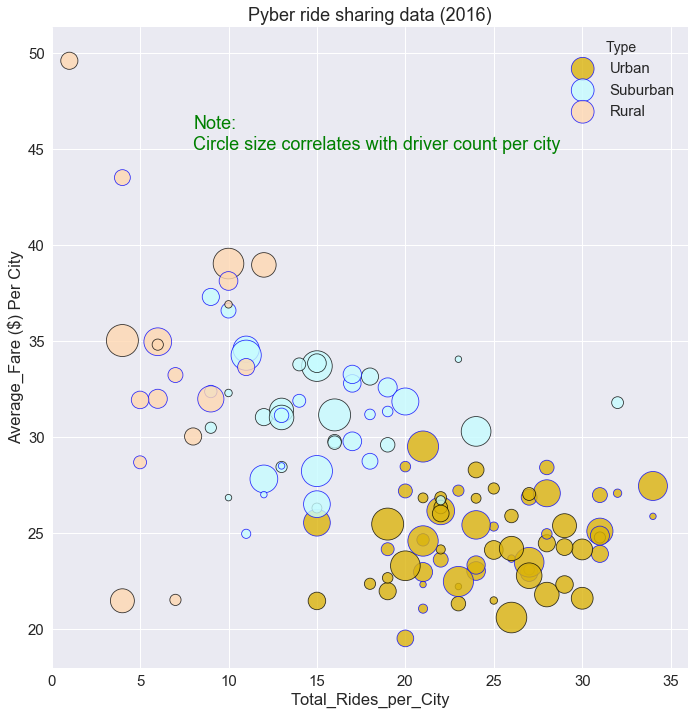

In [52]:
markersize = 14 * city_grouped_df['Total_Drivers_per_City'] #suitable multiplier (14) to see size difference in bubbles
kws = dict(s=markersize, linewidth=.8, edgecolor="bk")
sns.set(font_scale = 1.5)

max_rides = city_grouped_df['Total_Rides_per_City'].max()

pyber_palette = ['#dbb40c', '#c6fcff', '#ffd8b1']  # Gold, light Sky blue, light coral

sns.lmplot(x='Total_Rides_per_City', y='Average_Fare ($) Per City', data=city_grouped_df,
            fit_reg=False, # No regression line should be displayed
            palette=pyber_palette, 
            scatter_kws=kws,
            hue='Type',
            size = 10,
            legend_out=False)
plt.text(8, 45, "Note:\nCircle size correlates with driver count per city", horizontalalignment='left',size='medium', color='green', weight='light')
plt.title("Pyber ride sharing data (2016)")
plt.xlim(0, max_rides+2)    # margin so plot doesn't end at max value
plt.show()

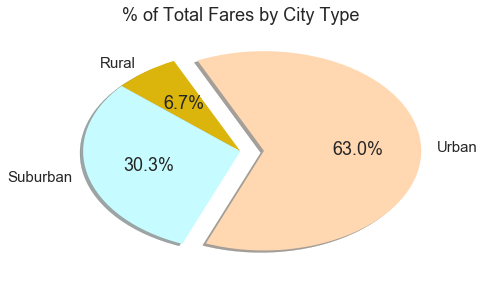

In [53]:
# Pie chart of "% of total fares by city type"

citytype_grouped = merged_df.groupby("type")
# % of total fares by city type

total_fare = merged_df["fare"].sum()

# Create a list of colors 
pyber_palette = ['#dbb40c', '#c6fcff', '#ffd8b1']  # Gold, light Sky blue, light coral

percent_fare_df = pd.DataFrame((citytype_grouped["fare"].sum()/total_fare)*100)

# Create a pie chart
plt.pie(
    # using data total
    percent_fare_df['fare'],
    # with the labels being city types
    labels= ['Rural', 'Suburban', 'Urban'],
    # with no shadows
    shadow=True,
    # with colors
    colors=pyber_palette,
    # with one slide exploded out
    explode=(0.00, 0.00, 0.15),
    # with the start angle at 115%
    startangle=115,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# plt.axis('equal') - commented out as we want oval and not circular

# View the plot
plt.tight_layout()
plt.title("% of Total Fares by City Type")
plt.show()


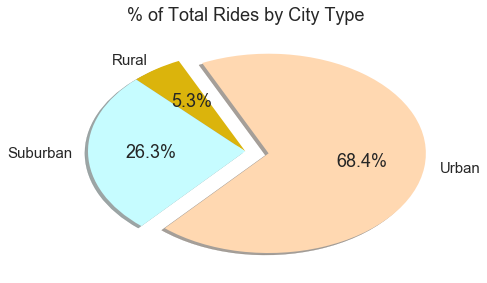

In [54]:
# Pie chart of "% of total rides by city type"

percent_ride_df = pd.DataFrame((citytype_grouped["ride_id"].count() / merged_df["ride_id"].count())*100)
pyber_palette = ['#dbb40c', '#c6fcff', '#ffd8b1']  # Gold, light Sky blue, light coral

# Create a pie chart
plt.pie(
    # using data total
    percent_ride_df['ride_id'],
    # with the labels being city types
    labels= ['Rural', 'Suburban', 'Urban'],
    # with no shadows
    shadow=True,
    # with colors
    colors=pyber_palette,
    # with one slide exploded out
    explode=(0.00, 0.00, 0.15),
    # with the start angle at 115%
    startangle=115,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot
# plt.axis('equal') - commented out as we want oval and not circular
plt.tight_layout()
plt.title("% of Total Rides by City Type")
plt.show()


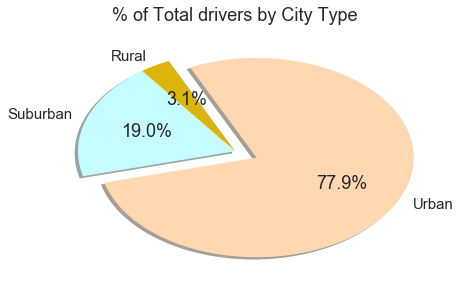

In [55]:
# Pie chart of "% of total drivers by city type"

type_and_city_grouped = merged_df.groupby(["type", "city"])

# driver_count is listed on each row for a city, so mean() is necessary, followed by sum() as below. 
total_number_of_drivers = type_and_city_grouped["driver_count"].mean().sum() 

type_and_city_grouped_df = pd.DataFrame(type_and_city_grouped["driver_count"].mean())
type_and_city_grouped_df.groupby(level=0).sum()  # sum of driver_count by first index (level=0), which is 'type'

percent_drivers_by_type_df = (type_and_city_grouped_df.groupby(level=0).sum()/total_number_of_drivers)*100 

pyber_palette = ['#dbb40c', '#c6fcff', '#ffd8b1']  # Gold, light Sky blue, light coral

# Create a pie chart
plt.pie(
    # using data total
    percent_drivers_by_type_df['driver_count'],
    # with the labels being city types
    labels= ['Rural', 'Suburban', 'Urban'],
    # with no shadows
    shadow=True,
    # with colors
    colors=pyber_palette,
    # with one slide exploded out
    explode=(0.00, 0.00, 0.15),
    # with the start angle at 115%
    startangle=115,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot
# plt.axis('equal') - commented out as we want oval and not circular
plt.tight_layout()
plt.title("% of Total drivers by City Type")
plt.show()
